In [10]:
import pandas as pd
pd.options.display.max_colwidth = 400
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns 
import matplotlib.pyplot as plt

In [11]:
senti = SentimentIntensityAnalyzer()

In [12]:
movies_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
movies_df.head()
movies_df.dropna()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an entertaining introduction to a promising new world -- but will the consuming shadow of Potter be too big to break free of?"
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transparent and slapdash than this wannabe-franchise jumpstarter directed by Chris Columbus.
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a good one, trotting out kernels of Greek mythology like so many Disney Channel references."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights and things exploding, [Columbus] squeezes in a few well-meaning pause breaks about friendship and absent fathers before swiftly moving on to the next pyrotechnics display."
...,...,...,...,...,...,...,...,...
1130004,m/zulu,Tony Sloman,False,Radio Times,Fresh,5/5,2017-07-10,The movie is a revelation.
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictment of British imperialism, but it seems a remarkably forward-thinking work."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of the Cy Endfield directed Zulu (1964).
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and the war. The former is concerned with a lot of British derring-do and priggish behavior. The latter consists of battle scenes with a lot of kinetic energy but not as much emotional punch as they should have."


In [13]:
movies_df["review_content"]=movies_df["review_content"].apply(str)

In [14]:
def calculate_sentiment(text): 
    s_scores = senti.polarity_scores(text)
    #extract compound score 
    compound_scores = s_scores['compound']
    return compound_scores

In [15]:
#test
calculate_sentiment('I hate you')

-0.5719

In [16]:
movies_df['sentiment_score'] = movies_df['review_content'].apply(calculate_sentiment)

In [17]:
pos_sentiment = movies_df.sort_values(by='sentiment_score', ascending=False)[:20]
pos_sentiment

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,sentiment_score
926816,m/the_artist,Deborah Ross,False,The Spectator,Fresh,NaN,2015-02-17,"Glorious, delicious and an unalloyed joy... I loved it. Loved it, loved it, loved it, loved it, loved it, loved it, loved it.",0.9927
170217,m/bedtime_stories,James Rocchi,False,Redbox,Rotten,2/5,2008-12-24,"Bedtime Stories tries to be charming and whimsical, but while charm and whimsy, like love, can be helped by great sums of money, charm and whimsy, like love, cannot be created by great sums of money.",0.9912
245430,m/clash_of_the_titans_2,R.L. Shaffer,False,IGN DVD,Fresh,7/10,2012-06-29,"Certainly sloppy, but visually rich, exciting and, thanks to several great supporting roles, a better, more character-driven tale that tops the original despite a more intimate feel.",0.9895
374517,m/gifted_2017,Louise Keller,False,Urban Cinefile,Fresh,NaN,2017-08-29,"The story may play out by the numbers, but thanks to a superb cast (and astute direction by The Amazing Spiderman's Marc Webb), Gifted is a welcome package: entertaining, engaging, sweetly funny and moving.",0.9894
1023436,m/the_triumph_of_love,Michael Dequina,False,Film Threat,Fresh,3/5,2002-12-08,"The Triumph of Love is, indeed, a triumph of love: love of performance, love of joy, and, above all else, love of love itself.",0.9892
85879,m/20000_days_on_earth,Ray Pride,False,Newcity,Fresh,NaN,2014-10-15,"It sounds like so much attenuated tosh, but this bold, unique gem is bright, funny, brooding, hopeful, momentarily visionary, a wounded beauty exploring the creative process in a fresh and oft-brilliant fashion.",0.9888
1071645,m/up,Avi Offer,False,NYC Movie Guru,Fresh,8/10,2009-05-29,"Fun, thrilling, imaginative and tender with breathtaking CGI effects, but it's much funnier and exhilarating for kids. Adults will be often amused, but they'll find that it lacks the ""wow!"" factor, brilliance and genuine warmth of a truly classic Pixar...",0.9888
538284,m/love_rosie,Isaac Feldberg,False,We Got This Covered,Fresh,7/10,2015-02-03,"Cynics should steer clear, but Love, Rosie boasts two charming leads, a genuinely sweet tenor and such a warm blend of humor and heart that it could easily become a new teen favorite.",0.9887
748860,m/rush_2013,Ian Freer,False,Empire Magazine,Fresh,4/5,2013-09-09,"It rarely deviates from formula, but Rush wins big, delivering the most exciting F1 footage created for film. Like Hunt, it is sexy, funny, full of thrills. Like Lauda, it is intelligent, a bit blunt, but ultimately touching.",0.9887
748857,m/rush_2013,Ian Freer,False,Empire Magazine,Fresh,4/5,2013-09-09,"It rarely deviates from formula, but Rush wins big, delivering the most exciting F1 footage created for film. Like Hunt, it is sexy, funny, full of thrills. Like Lauda, it is intelligent, a bit blunt, but ultimately touching.",0.9887


In [18]:
pos_str = str(pos_sentiment['review_content'])
#pos_str

In [19]:
#convert to lower case text
import re
pos_cleaned = pos_str.lower()
#pos_cleaned

pos_cleaned =re.sub(r'@\w+', ' ', pos_cleaned)
#pos_cleaned

pos_cleaned =re.sub(r'http\S+', ' ', pos_cleaned)
#pos_cleaned

pos_cleaned = re.sub(r'[^a-z A-Z]', ' ',pos_cleaned)
#pos_cleaned

pos_cleaned = re.sub(r'\b\w{1,2}\b', '', pos_cleaned)
#pos_cleaned

pos_cleaned = re.sub(r' +', ' ', pos_cleaned)
pos_cleaned

' glorious delicious and unalloyed joy loved loved loved loved loved loved loved loved bedtime stories tries charming and whimsical but while charm and whimsy like love can helped great sums money charm and whimsy like love cannot created great sums money certainly sloppy but visually rich exciting and thanks several great supporting roles better more character driven tale that tops the original despite more intimate feel the story may play out the numbers but thanks superb cast and astute direction the amazing spiderman marc webb gifted welcome package entertaining engaging sweetly funny and moving the triumph love indeed triumph love love performance love joy and above all else love love itself sounds like much attenuated tosh but this bold unique gem bright funny brooding hopeful momentarily visionary wounded beauty exploring the creative process fresh and oft brilliant fashion fun thrilling imaginative and tender with breathtaking cgi effects but much funnier and exhilarating for k

In [20]:
from wordcloud import WordCloud, STOPWORDS

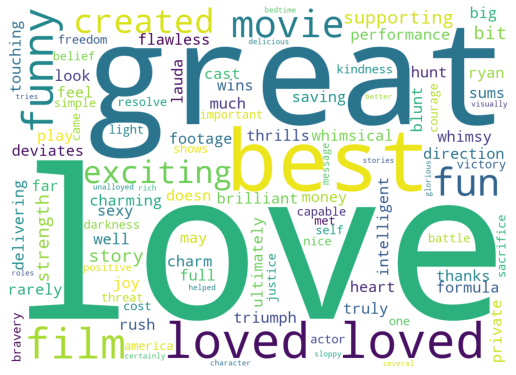

In [21]:
wc = WordCloud(max_words=100,
               max_font_size=500, 
               font_step=2, 
               stopwords=STOPWORDS, 
               background_color='white', 
               width=1000,
               height=720).generate(pos_cleaned)

plt.figure(figsize=(9,9))
plt.axis("off")
plt.imshow(wc)
plt.show()


In [22]:
neg_sentiment = movies_df.sort_values(by='sentiment_score', ascending=True)[:20]
neg_sentiment

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,sentiment_score
330400,m/extremely_wicked_shockingly_evil_and_vile,Andrew Parker,False,The Gate,Rotten,4.5/10,2019-05-03,"Well executed and performed, but ultimately hollow and meaningless, filmmaker Joe Berlinger's look back at the crimes of serial killer and rapist Ted Bundy, Extremely Wicked, Shockingly Evil and Vile is a distressingly passive exercise to behold.",-0.9922
1093131,m/we_need_to_talk_about_kevin,John Beifuss,False,"Commercial Appeal (Memphis, TN)",Rotten,2.5/4,2012-04-09,"Smug but fascinating: The movie is a woman's cry of anguish for an unjust world that enables men at all levels of age and power to get away with cruelty, brutality, murder and even war because, well, 'that's what boys DO.'",-0.9871
352151,m/fools_gold_2008,Austin Kennedy,False,Sin Magazine,Rotten,0.5/4,2008-07-22,I Hated Hated Hated Hated Hated Hated Hated This Movie!!!!!!!!!,-0.9868
616264,m/north,Roger Ebert,True,Chicago Sun-Times,Rotten,0/4,2000-01-01,I hated this movie. Hated hated hated hated hated this movie. Hated it.,-0.9854
520825,m/life_itself,Brian Henry Martin,False,UTV,Fresh,8/10,2014-12-07,"Ebert never sat on the fence, in fact sometimes he smashed it to smithereens. ""I hated this movie. Hated, hated, hated, hated, hated this movie. Hated it.""",-0.9854
439206,m/i_spit_on_your_grave,Brent Simon,False,Entertainment Today,Fresh,B,2003-01-20,"This brutal, explicit rape-revenge movie isn't for the faint of heart, but it's told with an eerie minimalism that marks it a grim, disturbing B-movie portrait of civilization's abuse at the hands of savagery, and its subsequent, equally barbarous revenge",-0.9847
295565,m/django_unchained_2012,Carla Meyer,False,Sacramento Bee,Rotten,2/4,2013-05-23,"The fear, anger and betrayal in Jackson's eyes, when Stephen feels his place is threatened, says more about the cruelties of slavery than the ultra- violent, sickening passages of ""Django Unchained.""",-0.9840
488391,m/keeping_up_with_the_joneses,Chris Sawin,False,Reel Rundown,Rotten,1/5,2016-10-23,"The cast is talented and the concept has potential, but Keeping Up with the Joneses chooses the painfully unamusing, preposterously ludicrous, and tragically annoying route and it's a more devastating and torturous experience because of it.",-0.9836
413539,m/hereditary,Neil Pond,False,Parade Magazine,Fresh,4/5,2018-06-07,"It borrows from other horror movies, but this tale of ancestry gone to hell and family dysfunction twisted, toxic, wicked, warped and wrong finds a horror path all its own.",-0.9822
78211,m/1211619-remember_me,Willie Waffle,False,WaffleMovies.com,Fresh,2.5/4,2010-03-12,I hate the ending. I hate it. I hate it. I hate it. I hate it more than Kim Basinger hates Alec Baldwin. I hate more than Garfield hates Mondays.,-0.9822


In [23]:
neg_str = str(neg_sentiment['review_content'])
#neg_str

#convert to lower case text
import re
neg_cleaned = neg_str.lower()

neg_cleaned =re.sub(r'@\w+', ' ', neg_cleaned)
#pos_cleaned

neg_cleaned =re.sub(r'http\S+', ' ', neg_cleaned)
#pos_cleaned

neg_cleaned = re.sub(r'[^a-z A-Z]', ' ',neg_cleaned)
#pos_cleaned

neg_cleaned = re.sub(r'\b\w{1,2}\b', '', neg_cleaned)
#pos_cleaned

neg_cleaned = re.sub(r' +', ' ', neg_cleaned)
neg_cleaned

' well executed and performed but ultimately hollow and meaningless filmmaker joe berlinger look back the crimes serial killer and rapist ted bundy extremely wicked shockingly evil and vile distressingly passive exercise behold smug but fascinating the movie woman cry anguish for unjust world that enables men all levels age and power get away with cruelty brutality murder and even war because well that what boys hated hated hated hated hated hated hated this movie hated this movie hated hated hated hated hated this movie hated ebert never sat the fence fact sometimes smashed smithereens hated this movie hated hated hated hated hated this movie hated this brutal explicit rape revenge movie isn for the faint heart but told with eerie minimalism that marks grim disturbing movie portrait civilization abuse the hands savagery and its subsequent equally barbarous revenge the fear anger and betrayal jackson eyes when stephen feels his place threatened says more about the cruelties slavery tha

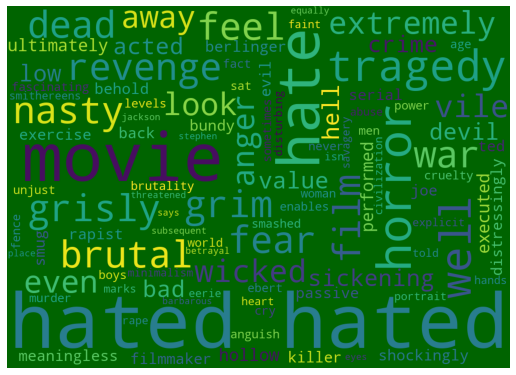

In [24]:
wc = WordCloud(max_words=100,
               max_font_size=500, 
               font_step=2, 
               stopwords=STOPWORDS, 
               background_color='darkgreen', 
               width=1000,
               height=720).generate(neg_cleaned)

plt.figure(figsize=(9,9))
plt.axis("off")
plt.imshow(wc)
plt.show()

array([[<AxesSubplot:title={'center':'sentiment_score'}>]], dtype=object)

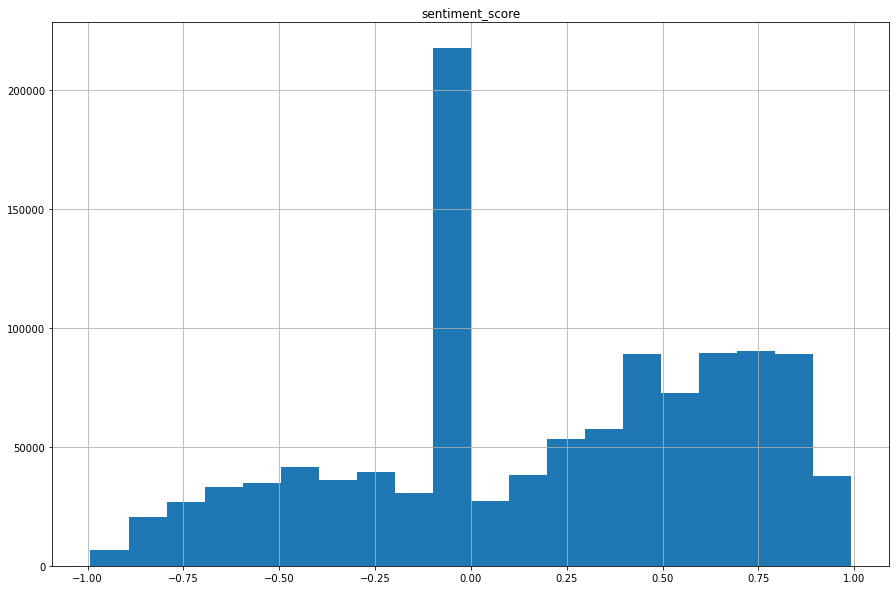

In [26]:
movies_df[["sentiment_score"]].hist(bins=20, figsize=(15, 10))